## Midterm

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# I.a

First, $f$ is continuous on $[-a, a]$. Hence, by Taylor's theorem and the Lagrange form of the remainder, $\exists \xi_+, \xi_- \in ]-h, h[$ for any $0<h<a$ such that
$$
f(h) = f(0)+hf'(0)+\frac{h^2}{2}f''(0)+\frac{h^3}{6}f'''(\xi_+)
$$

Similarly, 
$$
f(-h) = f(0)-hf'(0)+\frac{h^2}{2}f''(0)-\frac{h^3}{6}f'''(\xi_-)
$$

Thus,
$$
f(h)-f(-h) = 2hf'(0)+\frac{h^3}{6}f'''(\xi_+)+\frac{h^3}{6}f'''(\xi_-)
$$

Now, $f'''$ is continuous. By the MVT, $\exists\ \xi \in\ ]\xi_-, \xi_+[\ \subseteq\  ]-h, h[$ such that $\frac{h^3}{6}f'''(\xi_+)+\frac{h^3}{6}f'''(\xi_-) = \frac{h^3}{3}f'''(\xi)$. Thus,
$$
f(h)-f(-h) = 2hf'(0)+\frac{h^3}{3}f'''(\xi)
$$

Substituting this in for the equation of $\tilde{D}_h$, we obtain
$$
\tilde{D}_h = \frac{1}{2h}(2hf'(0)+\frac{h^3}{3}f'''(\xi)+\delta f(h)-\delta f(-h)\\
$$

Rearranging,
$$
\tilde{D}_h-f'(0) = \frac{h^2}{6}f'''(\xi)+\frac{\delta f(h)-\delta f(-h)}{2h}
$$

where $\xi \in ]-h, h[$.

# I.b
First, as $\xi \in ]-a,a[$, we have $f'''(\xi)\leq \max\limits_{x\in]-a,a[}f'''(x)\leq\max\limits_{x\in]-a,a[}|f'''(x)| :=M$. By hypothesis, $|\delta f(x)|\leq\varepsilon$. Applying the triangle inequality twice, we have

\begin{align*}
|\tilde{D}_h-f'(0)| &= \big|\frac{h^2}{6}f'''(\xi)+\frac{\delta f(h)-\delta f(-h)}{2h}\big|\\
&\leq \big|\frac{h^2}{6}f'''(\xi)\big|+\frac{|\delta f(h)|+|\delta f(-h)|}{2h}\\
&\leq \frac{Mh^2}{6}+\frac{\varepsilon}{h}
\end{align*}


To find the minimum of $B(h)=\frac{\varepsilon}{2h}+\frac{Mh^2}{6}$ we differentiate it with respect to $h$.
$$
B'(h) = \frac{-\varepsilon}{-h^2}+\frac{Mh}{3}
$$
Thus, 
$$
h^3 = \frac{3\varepsilon}{M} \implies h = \big(\frac{3\varepsilon}{M}\big)^{1/3}
$$
minimizes $B$, as from the plot, the extremum is a minimum.

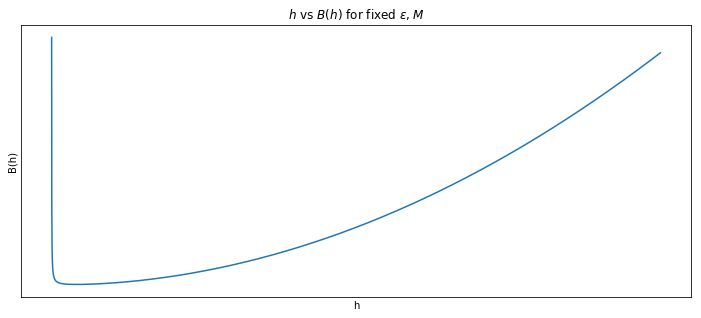

In [2]:
M = 1
h = np.linspace(0.0001, 0.75, 1000000)
epsilon = 0.00001
B = lambda h: epsilon/h + M*h**2 / 6

fig = plt.figure(figsize=(12, 5))
plt.title(r'$h$ vs $B(h)$ for fixed $\varepsilon, M$')
plt.plot(h, B(h))
plt.xlabel("h")
plt.ylabel("B(h)")
plt.xticks([])
plt.yticks([])
plt.show()

For any fixed $\varepsilon$, we have that $\frac{\varepsilon}{h}\rightarrow\infty$ as $h\rightarrow 0+$. Thus, $\lim\limits_{h\rightarrow 0+}B(h) = \infty$. Hence, choosing $h< \big(\frac{3\varepsilon}{M}\big)^{1/3}$ can lead to an error that grows without bounds, with the bound of the error increasing the smaller we let $h$ be beyond that minimum point, leading to a poor approximation of the derivative of $f$.

# II.a
We analyze the function $f(x)=|x|$.

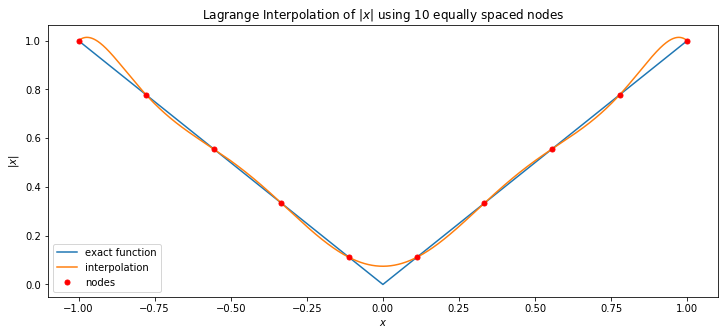

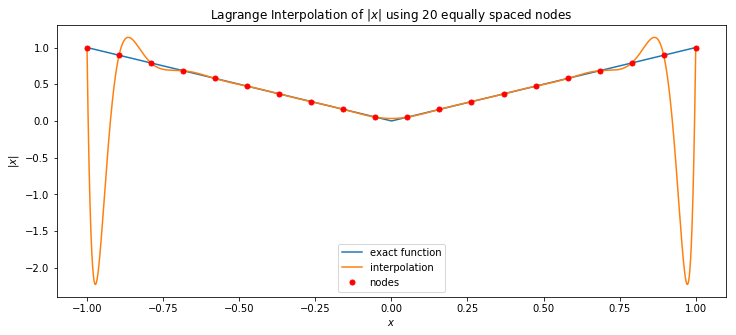

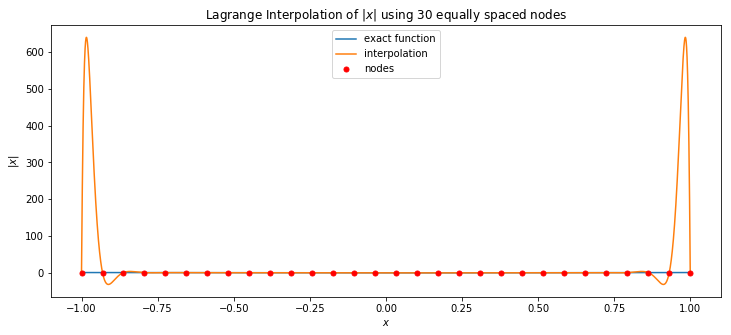

In [3]:
def f(x):
    return (abs(x))

def lagrange(xlist, x):
    n = len(xlist)
    p = 0
    for j in range(n):
        w = 1
        jlist = xlist[j]
        fjlist = f(jlist)
        for k in range(n):
            if k != j:
                w *= (((x - xlist[k])/(jlist - xlist[k])))
        p += (w* fjlist)
    return p
x = np.linspace(-1, 1, 10000)

n=10
xlist = np.linspace(-1, 1, n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d equally spaced nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = np.linspace(-1, 1, n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d equally spaced nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = np.linspace(-1, 1, n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d equally spaced nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()


The Runge phenomenon is very apparent in the latter two plots, where the interpolation near 0 seem to fit quite well, but the interpolation on the outermost nodes is off by orders of magnitude. 

# II.b
Chebyshev nodes on $]-1, 1[$ are
$$
 x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n
$$

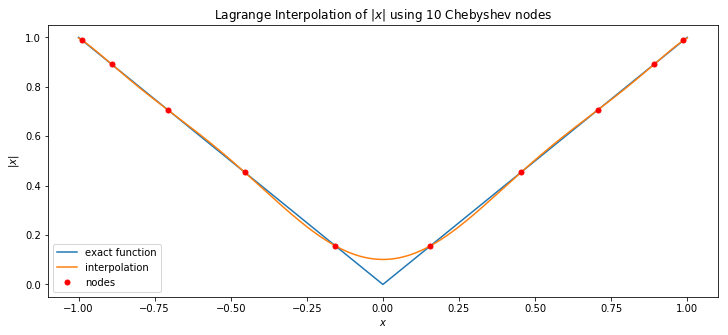

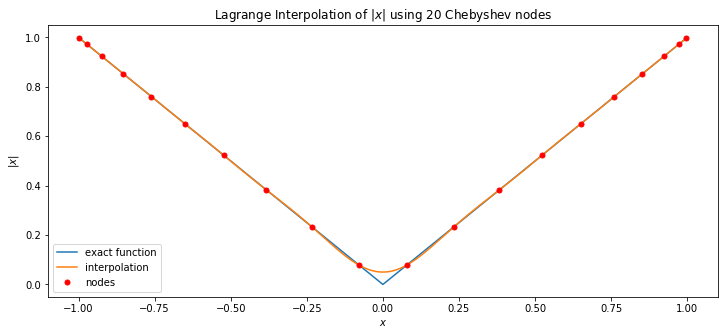

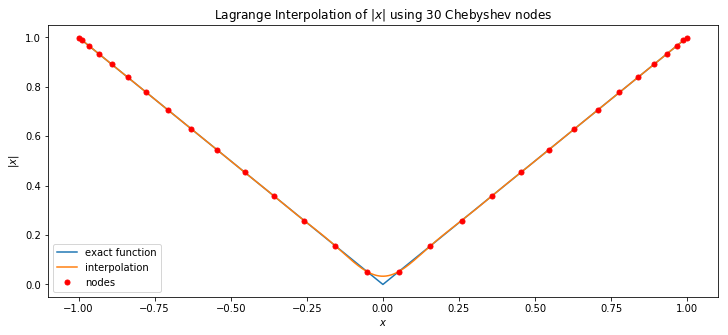

In [5]:
def chebyshev(n):
    return [np.cos(((2*k-1)*np.pi)/(2*n)) for k in range(1, n+1)]

n=10
xlist = chebyshev(n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = chebyshev(n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = chebyshev(n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrange(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

The difference between Chebyshev nodes and equally spaced nodes is drastic. The interpolations with Chebyshev nodes show no sign of Runge's phenomenon, and approximate $f$ extremely well, especially near the end points. Additionally, in contrast with equally spaced nodes, the approximation becomes better with bigger $n$ (at least for the small $n$ values used here).

# II.c


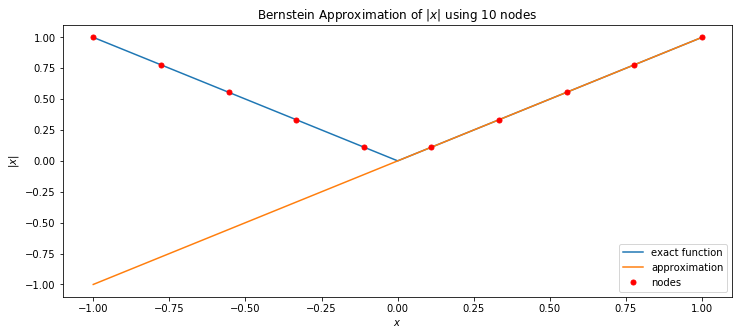

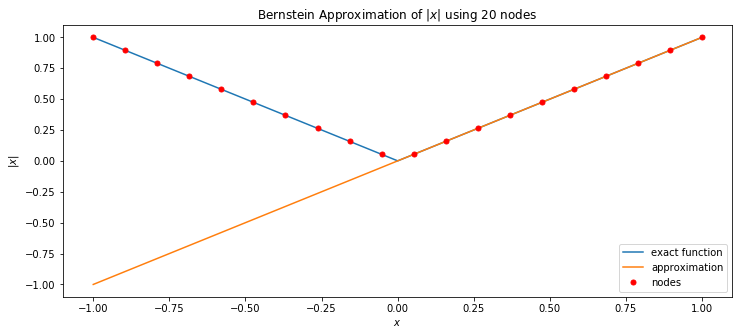

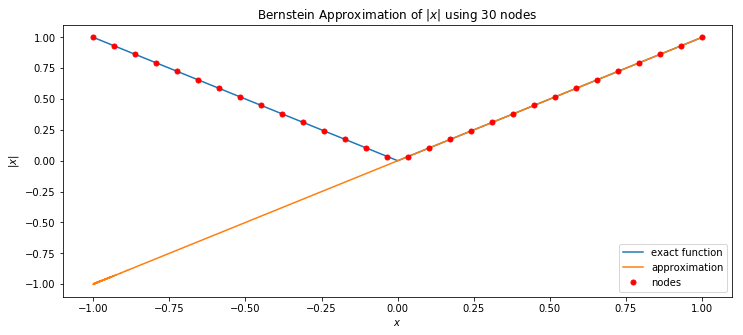

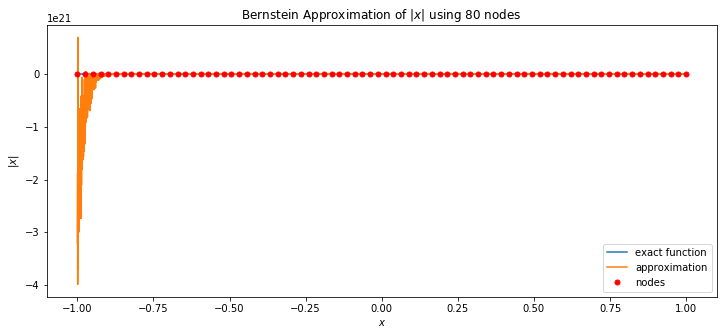

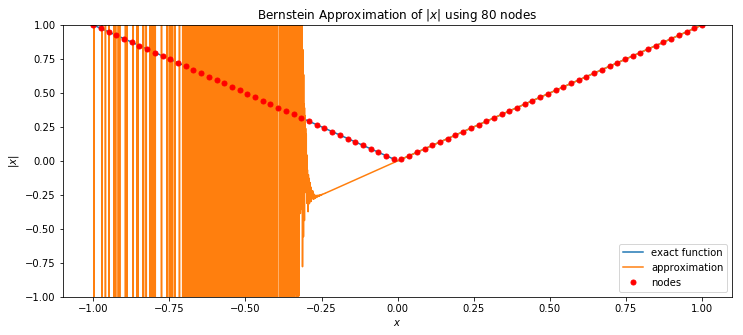

In [6]:
def bernstein(n, x):
    B_n = 0
    for i in range(0, n+1):
        B_n += (sp.binom(n, i) * x**i * (1 - x)**(n-i)*f(float((i)/n)))
    return B_n

n=10
xlist = np.linspace(-1, 1, n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes", markersize=5)

plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = np.linspace(-1, 1, n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = np.linspace(-1, 1, n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)
plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=80
xlist = np.linspace(-1, 1, n)

fig3 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)
plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

fig4 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)
plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.ylim([-1,1])
plt.show()

Surprisingly, in contrast with the two interpolations, using Bernstein polynamials seemed to approximate $f$ by just $x$. We increased the numbbers of nodes tested to see if this holds still, which it does not with 80, as seen in the last two plots. The approximation seems to be getting worse when increasing $n$, especailly close to -1. Because of computational limits, we cannot test higher $n$ values, but the Bernstein approximation should converge to $f$ in the max norm, as seen in class. This phenomenon perhaps stems from the fact that $f$ is not continuously differentiable, suggesting that, in practice, Bernstein approximation is useful only on a restricted set of continuous function satisfying some additional regularity conditions. Another reason for this occurence could be that with increasing $n$, we are trying to approximate a function which is basically a piecewise linear polynomial by higher and higher degree polynomials. 

For small $n$, Lagrange interpolation with equally spaced nodes is better than Bernstein approximation, which would not be the case for large enough $n$, when Runge's phenomenon becomes extreme.

We conclude that overall, for the relatively small number of nodes used, Lagrange interpolation with Chebyshev nodes is by far the best. 